<a href="https://colab.research.google.com/github/Nithilan98/Chennai_House_Price_Prediction_Final_Project/blob/main/Chennai_house_price_prediction_Nithilaselvan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: NITHILASELVAN V 

BATCH:  D18

# Chennai House Price Prediction
## Problem Statement

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

## Minimum Requirements
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

## Objective
* The model must be analysed to find the important factors that contribute towards the sales price
* It will be better to give a forecast range(range of permissible values) rathar than a single estimate as it will help the customers to negotiate.

## Data Description
## Features

* PRT_ID -- Property ID
* INT_SQFT -- The interior sq.Ft of the property
* DIST_MAINROAD -- The distance of the property to the main road
* N_BEDROOM -- The number of Bed rooms
* N_BATHROOM -- The number of bathroom
* N_ROOM --Toal Number of Rooms
* QS_ROOMS--The quality Score assigned for rooms based on buyer reviews
* QS_BATHROOM -- The quality score assigned for bathroom on buyer reviews
* QS_BEDROOM -- The quality score assigned for bedroom on buyer reviews
* QS_OVERALL -- The Overall quality score assigned for the property
* SALE_COND -- The Sale condition
   * Normal
   * Abnormal
   * Adjland
   * Family
   * Partial
* BUILDTYPE -- The type of buliding
   * House
   * Commercial
   * Others
* UTILITY_AVAIL
   * Allpub: All public utilites
   * NoSewr:Electricity,Gas, and Water
   * NoSewa:Electricty and gas only
   * ELO: Elecctricty only
* STREET
   * Gravel
   * Paved
   * No Access
* MZZONE
   * A: Agriculture
   * C: Commercial
   * I: Industrial
   * RH: Residential High Density
   * RL: Residential Low Density
   * RM: Residential Medium Density

* REG_FEE -- Resgistration fees for the property
* COMMIS -- The Commission paid to the agen
* SALES_PRICE-- The total sale price of the property

## importing Required Packages and loading the dataset 

In [ ]:
##understand the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [ ]:
data = pd.read_csv('train-chennai-sale.csv')
#Print the top5 records
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:

#shape of the data
data.shape

(7109, 22)

## Understand the dataset

In [ ]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
#Description of Data
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


* Maximum house price is ₹23,667,340
* Minimun house price is ₹2,156,875
* The houses in the dataset ranges from 500 to 2500 sq ft.
* maximum number of bedrooms is 4 miniumn number of bedroom is 1
* maximum number of bathrooms in a house is 2 minumum 1

### Removing unwanted columns or feature


In [ ]:
data = data.drop(['PRT_ID','REG_FEE','COMMIS'],axis = 'columns')


In [ ]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


# Data Cleaning
 * missing values
 * check duplicate values
 * convert the type
 * check spelling mistakes
 

## Missing Values


In [ ]:
#check for Null values
data.isna().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [ ]:
#here we will check the perentage of nan values present in each feature
features_with_na = [features for features in data.columns if data[features].isnull().sum()>0]
#print the feature name and the percentage of missing values
for feature in features_with_na:
  print(feature,np.round(data[feature].isnull().mean(),4), '% missing values')

N_BEDROOM 0.0001 % missing values
N_BATHROOM 0.0007 % missing values
QS_OVERALL 0.0068 % missing values


## **NOTE:** Since the percentage of missing values is very very low. Therfore we can delete those values from the data set because which will not affect much the target(salses price)

In [ ]:
data = data.dropna(how="any",axis = 0)


In [ ]:
data.isna().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

* no missing values not there in the dataset


### Droping duplicates if there

In [ ]:
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7056 non-null   object 
 1   INT_SQFT       7056 non-null   int64  
 2   DATE_SALE      7056 non-null   object 
 3   DIST_MAINROAD  7056 non-null   int64  
 4   N_BEDROOM      7056 non-null   float64
 5   N_BATHROOM     7056 non-null   float64
 6   N_ROOM         7056 non-null   int64  
 7   SALE_COND      7056 non-null   object 
 8   PARK_FACIL     7056 non-null   object 
 9   DATE_BUILD     7056 non-null   object 
 10  BUILDTYPE      7056 non-null   object 
 11  UTILITY_AVAIL  7056 non-null   object 
 12  STREET         7056 non-null   object 
 13  MZZONE         7056 non-null   object 
 14  QS_ROOMS       7056 non-null   float64
 15  QS_BATHROOM    7056 non-null   float64
 16  QS_BEDROOM     7056 non-null   float64
 17  QS_OVERALL     7056 non-null   float64
 18  SALES_PR

### Checking the null values in the feature using heatmap

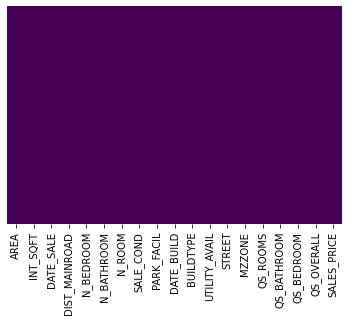

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Convert the objects to datetime objects

In [ ]:
data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'])
data['DATE_BUILD'] = pd.to_datetime(data["DATE_BUILD"])

In [ ]:
## Converting Datatypes from float to int
data["N_BATHROOM"] = np.floor(pd.to_numeric(data["N_BATHROOM"])).astype("Int64")
data["N_BEDROOM"] = np.floor(pd.to_numeric(data["N_BEDROOM"])).astype("Int64")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7056 non-null   object        
 1   INT_SQFT       7056 non-null   int64         
 2   DATE_SALE      7056 non-null   datetime64[ns]
 3   DIST_MAINROAD  7056 non-null   int64         
 4   N_BEDROOM      7056 non-null   Int64         
 5   N_BATHROOM     7056 non-null   Int64         
 6   N_ROOM         7056 non-null   int64         
 7   SALE_COND      7056 non-null   object        
 8   PARK_FACIL     7056 non-null   object        
 9   DATE_BUILD     7056 non-null   datetime64[ns]
 10  BUILDTYPE      7056 non-null   object        
 11  UTILITY_AVAIL  7056 non-null   object        
 12  STREET         7056 non-null   object        
 13  MZZONE         7056 non-null   object        
 14  QS_ROOMS       7056 non-null   float64       
 15  QS_BATHROOM    7056 n

In [ ]:
data['YearSold'] = data['DATE_SALE'].dt.year
data['YearBuild'] = data['DATE_BUILD'].dt.year

In [ ]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YearSold,YearBuild
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979


Text(0.5, 1.0, 'House Price vs YearSold')

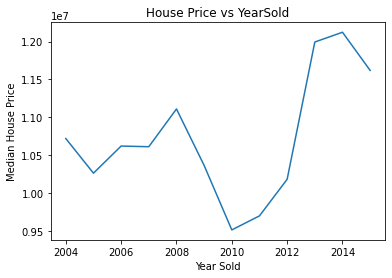

In [ ]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

data.groupby('YearSold')['SALES_PRICE'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

In [ ]:
## Drop the datesale and databuild columns
data = data.drop(columns=['DATE_SALE','DATE_BUILD'])

In [ ]:
data.head(2)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YearSold,YearBuild
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995


## House life time calculations

In [ ]:
data['Houselife']=data['YearSold']-data['YearBuild']

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YearSold,YearBuild,Houselife
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30


In [ ]:
#numeric features
numeric_feature = data.select_dtypes(exclude=['object'])
numeric_feature.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE',
       'YearSold', 'YearBuild', 'Houselife'],
      dtype='object')

In [ ]:
#categorical features 
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
categorical_features

['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

## checking the spelling mistake

**AREA**

In [ ]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
data['AREA'].value_counts()

Chrompet      1671
Karapakkam    1356
KK Nagar       989
Velachery      973
Anna Nagar     772
Adyar          768
T Nagar        490
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

**The above analysis of value counts shows that there are misspelled words are there so replace the missspelled words using the correct words**

T Nagar-TNagar, chrompt-Chrompet,Karapakam-Karapakkam these are all same 

In [ ]:
data['AREA'] = data['AREA'].replace(['TNagar','Chrompt','Chrmpet','Karapakam','Ana Nagar','Chormpet','Adyr','Velchery','Ann Nagar','KKNagar'],
                                          ['T Nagar','Chrompet','Chrompet','Karapakkam','Anna Nagar','Chrompet','Adyar','Velachery','Anna Nagar','KK Nagar'])

In [ ]:
data['AREA'].value_counts()

Chrompet      1691
Karapakkam    1359
KK Nagar       990
Velachery      975
Anna Nagar     777
Adyar          769
T Nagar        495
Name: AREA, dtype: int64

**PARK_FACIL**

In [ ]:
data.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
#replace the misspelled words for parking facilities
data['PARK_FACIL'] = data['PARK_FACIL'].replace(['Noo'],'No')

In [ ]:
data.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

**BUILDTYPE**

In [ ]:
## check the builtype words
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
data['BUILDTYPE'] = data['BUILDTYPE'].replace(['Other'],'Others')
data['BUILDTYPE'] = data['BUILDTYPE'].replace(['Comercial'],'Commercial')

In [ ]:
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

**STREET**

In [ ]:
## check the street words are correct or not
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
data['STREET'] = data['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'])

In [ ]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

**MZZONE**

In [ ]:
#check the zone variable are correct or not
data.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

**SALE_COND**

In [ ]:
#check the sale_cond variable 
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
data['SALE_COND'] = data['SALE_COND'].replace(['Ab Normal'],'AbNormal')
data['SALE_COND'] = data['SALE_COND'].replace(['PartiaLl','Partiall'],'Partial')
data['SALE_COND'] = data['SALE_COND'].replace(['Adj Land'],'AdjLand')

In [ ]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

**UTILITY_AVAIL**

In [ ]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
data['UTILITY_AVAIL'] = data['UTILITY_AVAIL'].replace({'All Pub':'AllPub',"NoSewr ":"NoSewr"})

In [ ]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [ ]:
data.head(2)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YearSold,YearBuild,Houselife
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11


# Exploratory Data Analysis

* analysis of the data

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YearSold,YearBuild,Houselife
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30


**Area vs Sales_price**

In [ ]:
#number of unique values in area
data.AREA.nunique()

7

In [ ]:
#percentage of the houes in the area
area = data.AREA.value_counts().reset_index(name='count')
area['percentage'] = round(area['count'] / data.shape[0] * 100, 2)
area

,index,count,percentage
0,Chrompet,1691,23.97
1,Karapakkam,1359,19.26
2,KK Nagar,990,14.03
3,Velachery,975,13.82
4,Anna Nagar,777,11.01
5,Adyar,769,10.90
6,T Nagar,495,7.02


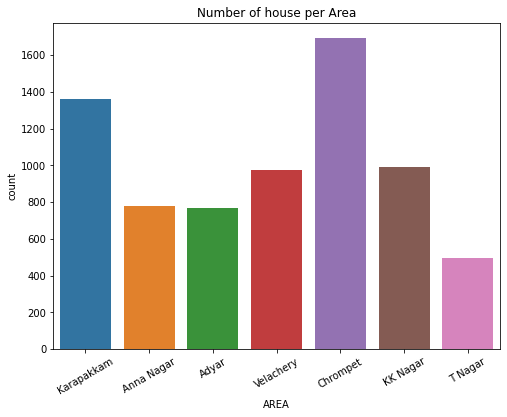

In [ ]:
#Number of houses vs Area
plt.figure(figsize= (8,6))
sns.countplot(x='AREA', data=data)
plt.title("Number of house per Area")
plt.xticks(rotation=30)
plt.show()

* so many houses sold in chrompet followed by karapakkam,velachery,kk nagar


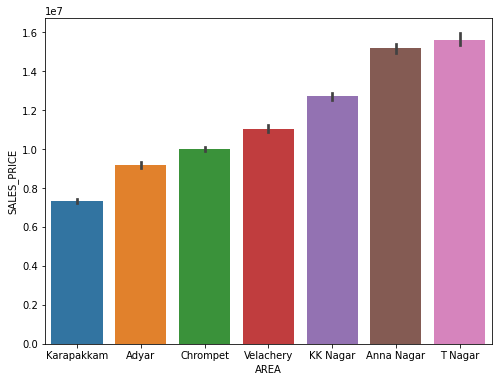

In [ ]:
#plot the graphs area vise sales price 
plt.figure(figsize= (8,6))
sns.barplot(x="AREA",y="SALES_PRICE",data=data,order=data.groupby("AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["AREA"])

* Area wise house price equally distributed have order in the linear relationship
* T nagar have the expensive houses
* Karapakkam has the cheapest houses
* Encoding we have to do the label encoding is the better option

**square_feet**

In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'YearSold', 'YearBuild', 'Houselife'],
      dtype='object')

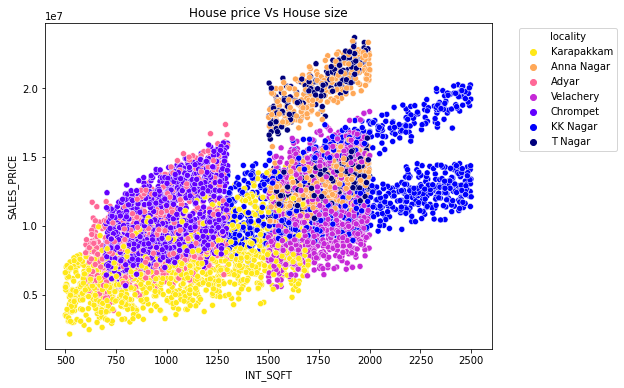

In [ ]:
#plot the graphs square feet wise sales price
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='INT_SQFT', y='SALES_PRICE', hue='AREA', palette='gnuplot2_r')
plt.title("House price Vs House size")
plt.legend(title='locality',bbox_to_anchor=(1.05, 1))
plt.show()

* KK Nagar house are bigger  squere feet 
* karapakam houses are smaller square feet 

**Distance form Main Road**

In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'YearSold', 'YearBuild', 'Houselife'],
      dtype='object')

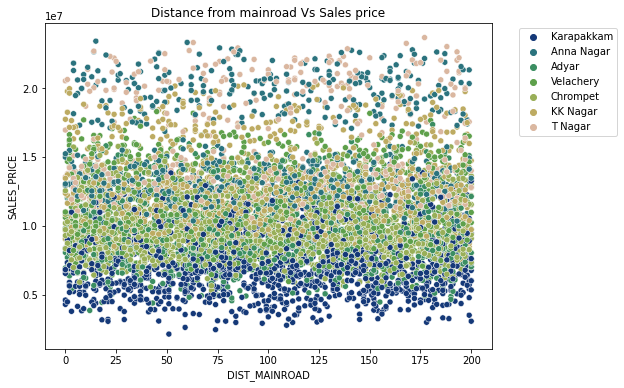

In [ ]:
#distance from mainroad vs sales price
plt.figure(figsize=(8,6))
sns.scatterplot(x='DIST_MAINROAD',y='SALES_PRICE', data=data, hue='AREA', palette='gist_earth')
plt.title("Distance from mainroad Vs Sales price")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

* The houses to far from main road is 200km
* The distance form main road in all AREA has uniform distribution.
* We can drop this feature for machine learning.
* DIST_MAINROAD does not affect the sales price much.

**Bedrooms**

In [ ]:
data.N_BEDROOM.value_counts()

1    3773
2    2327
3     703
4     253
Name: N_BEDROOM, dtype: Int64

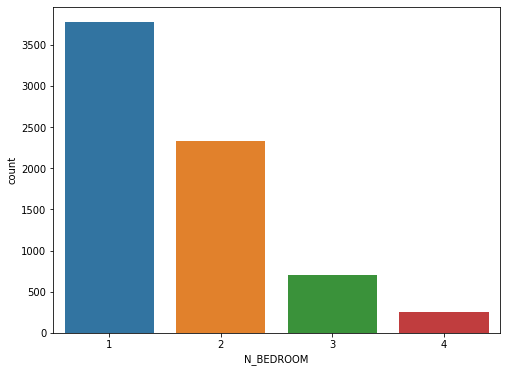

In [ ]:
#plot the count of bedrooms
plt.figure(figsize=(8,6))
sns.countplot(x=data["N_BEDROOM"], data=data)
plt.show()

* The single bedroom has most of the houses followed by the double bedroom

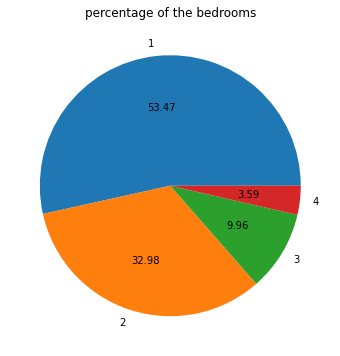

In [ ]:
#find the percentage of the bedrooms
plt.figure(figsize=(8,6))
data.N_BEDROOM.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("percentage of the bedrooms")
plt.ylabel('')
plt.show()

* There are 53% of the houses had only single bedrooms
* 32% of the houses had two bedrooms
* 9.96% of the houses has 3 bedrooms
* 3.59% of the houses has 4 bedrooms

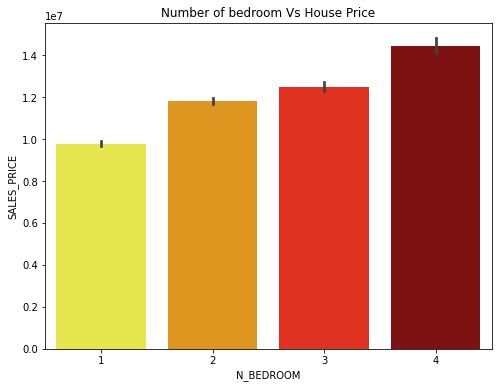

In [ ]:
#number of bedroom wise sales price graph
plt.figure(figsize=(8,6))
sns.barplot(data=data, x='N_BEDROOM',y='SALES_PRICE', palette='hot_r')
plt.title("Number of bedroom Vs House Price")
plt.show()

* The bedrooms size increases the sales price was also increases so it follows linear relations

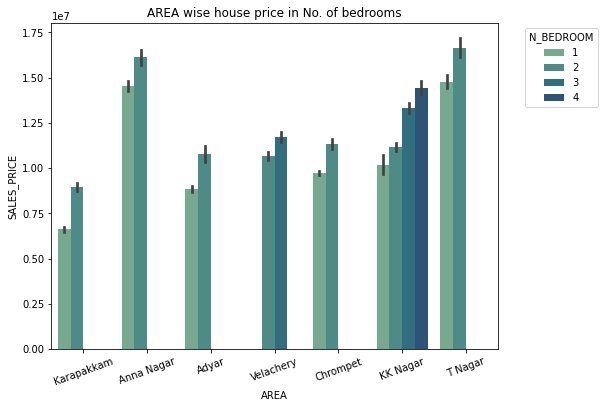

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='AREA',y='SALES_PRICE', data=data, hue='N_BEDROOM', palette='crest')
plt.title("AREA wise house price in No. of bedrooms")
plt.xticks(rotation=20)
plt.legend(title='N_BEDROOM',bbox_to_anchor=(1.05,1))
plt.show()

* above diagrams shows that most of the area has single rooms


**Bathrooms**

In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'YearSold', 'YearBuild', 'Houselife'],
      dtype='object')

In [ ]:
data.N_BATHROOM.value_counts()

1    5552
2    1504
Name: N_BATHROOM, dtype: Int64

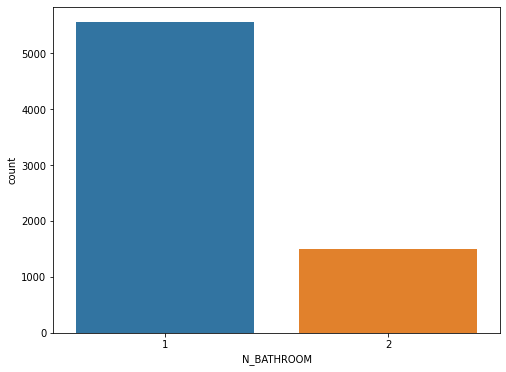

In [ ]:
#plot the count of BATHROOM
plt.figure(figsize=(8,6))
sns.countplot(x=data["N_BATHROOM"], data=data)
plt.show()

* Most of the house has atleas 1 bathroom
* more than one bathroom was very few houses

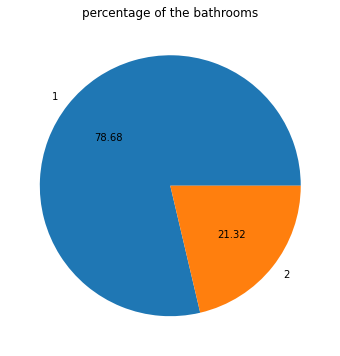

In [ ]:
#find the percentage of the bathrooms
plt.figure(figsize=(8,6))
data.N_BATHROOM.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("percentage of the bathrooms")
plt.ylabel('')
plt.show()

78.68% of the house have only single bathroom only.

**Rooms**

In [ ]:
data.N_ROOM.value_counts()

4    2539
3    2112
5    1233
2     919
6     253
Name: N_ROOM, dtype: int64

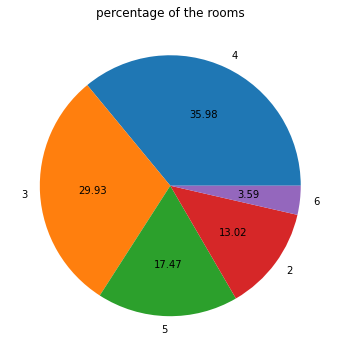

In [ ]:
#find the percentage of the Rooms
plt.figure(figsize=(8,6))
data.N_ROOM.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("percentage of the rooms")
plt.ylabel('')
plt.show()

The abouve pie-char shows that most of the people total rooms need to be in the house is 4 followed by 3

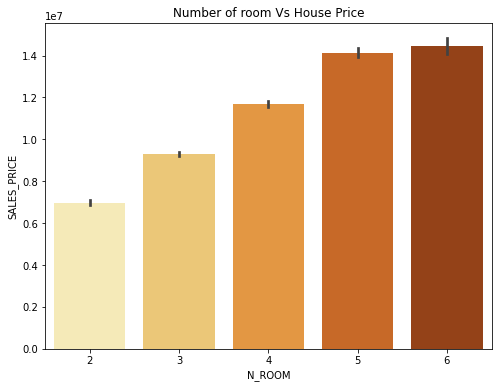

In [ ]:
#number of rooms vs house price
plt.figure(figsize=(8,6))
sns.barplot(data=data, x='N_ROOM',y='SALES_PRICE', palette='YlOrBr')
plt.title("Number of room Vs House Price")
plt.show()

* The increase the number of rooms and also increaser the house price.

**Sale_cond**

In [ ]:
data.SALE_COND.value_counts()

AdjLand        1432
Partial        1417
Normal Sale    1416
AbNormal       1401
Family         1390
Name: SALE_COND, dtype: int64

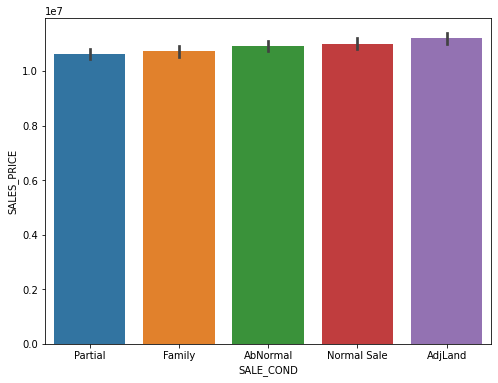

In [ ]:
plt.figure(figsize= (8,6))
sns.barplot(x="SALE_COND",y="SALES_PRICE",data=data,order=data.groupby("SALE_COND")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["SALE_COND"])

* There is a slide linear relationship between sale_cond and Sales_price
* Adjland has of highest price
* partial is the lowest price 
* So we have to do the label encoding for this feature

**Parking facilities**

In [ ]:
data.PARK_FACIL.value_counts()

Yes    3557
No     3499
Name: PARK_FACIL, dtype: int64

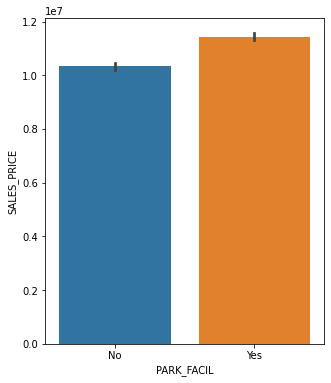

In [ ]:
plt.figure(figsize= (5,6))
sns.barplot(x="PARK_FACIL", y ="SALES_PRICE",data=data,order=data.groupby("PARK_FACIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["PARK_FACIL"])

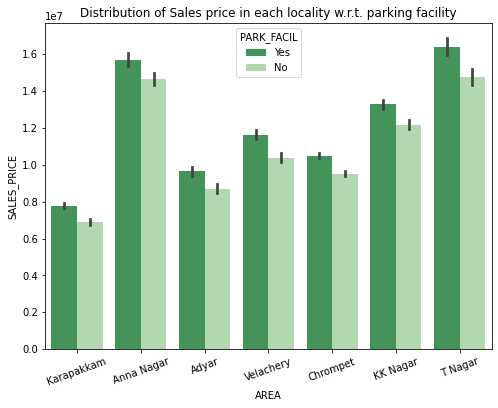

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='AREA', y='SALES_PRICE', data=data, hue='PARK_FACIL', palette='Greens_r')
plt.xticks(rotation=20)
plt.title("Distribution of Sales price in each locality w.r.t. parking facility")
plt.show()

* All the area has parking facility


**`Build type`**

In [ ]:
data.BUILDTYPE.value_counts()

House         2433
Others        2312
Commercial    2311
Name: BUILDTYPE, dtype: int64

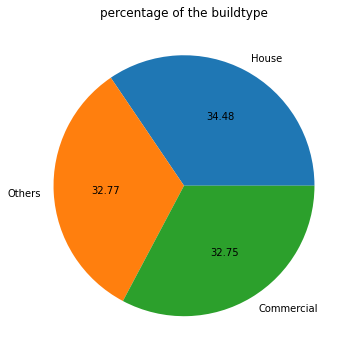

In [ ]:
plt.figure(figsize=(8,6))
data.BUILDTYPE.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("percentage of the buildtype")
plt.ylabel('')
plt.show()

* Tha dataset has more number of ordinary house build type 
* commercial building or very less 

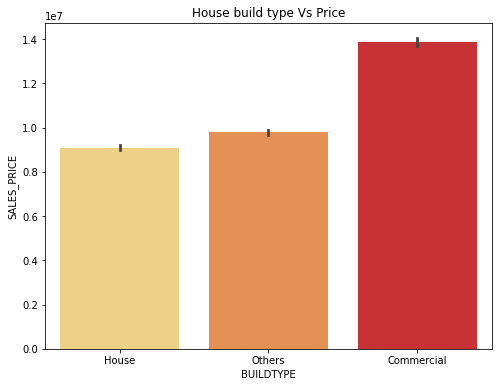

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='BUILDTYPE', y='SALES_PRICE', data=data, order=data[['BUILDTYPE','SALES_PRICE']].groupby('BUILDTYPE').mean().sort_values('SALES_PRICE').reset_index().BUILDTYPE, palette='YlOrRd')
plt.title("House build type Vs Price")
plt.show()

* commercial houses are more expensive than other thats why very less number of commercial building are there. 
* BUILDTYPE do not follow linear relation
* So One-hot encoding is a better choice rather than label encoding

**UTILITY_AVAIL**

In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'YearSold', 'YearBuild', 'Houselife'],
      dtype='object')

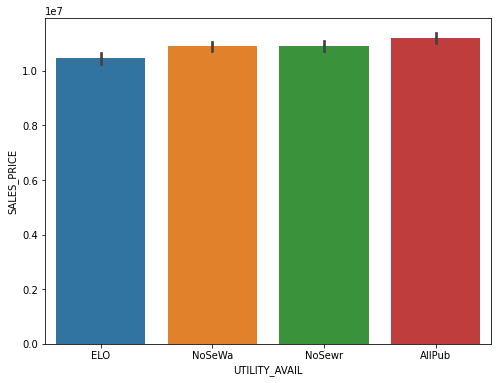

In [ ]:
plt.figure(figsize= (8,6))
sns.barplot(x="UTILITY_AVAIL",y="SALES_PRICE",data=data,order=data.groupby("UTILITY_AVAIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["UTILITY_AVAIL"])

* There is a linear relationship between the UTILITY_AVAIL and SALES_PRICE
* The label encoding is best for this feature

In [ ]:
utility = data.UTILITY_AVAIL.value_counts()

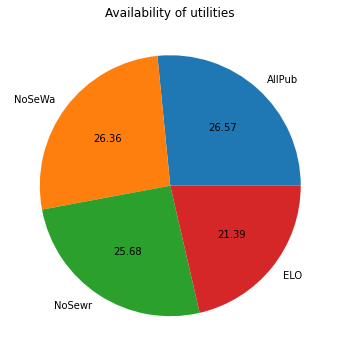

In [ ]:
plt.figure(figsize= (8,6))
utility.plot(kind='pie', autopct="%.2f")
plt.title("Availability of utilities")
plt.ylabel('')
plt.show()

* 26.57% of the houses has allpub utilites

**Street**

In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'YearSold', 'YearBuild', 'Houselife'],
      dtype='object')

In [ ]:
street = data.STREET.value_counts()

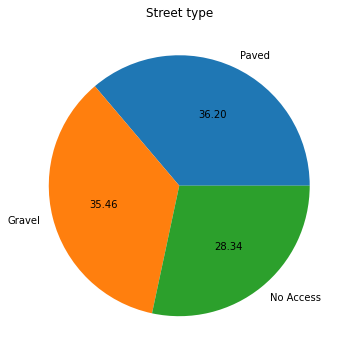

In [ ]:
plt.figure(figsize= (8,6))
street.plot(kind='pie', autopct="%.2f")
plt.title("Street type")
plt.ylabel('')
plt.show()

* most of the percentage street was paved street
* 28% only No access

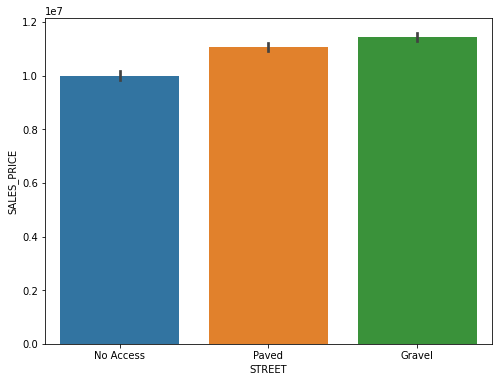

In [ ]:
plt.figure(figsize= (8,6))
sns.barplot(x="STREET",y="SALES_PRICE",data=data,order=data.groupby("STREET")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["STREET"])

* The type of street follows the linear relation
* Gravel houses have highest price
* Hence We Are Using Lable Encoding

**MZZONE**

In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'YearSold', 'YearBuild', 'Houselife'],
      dtype='object')

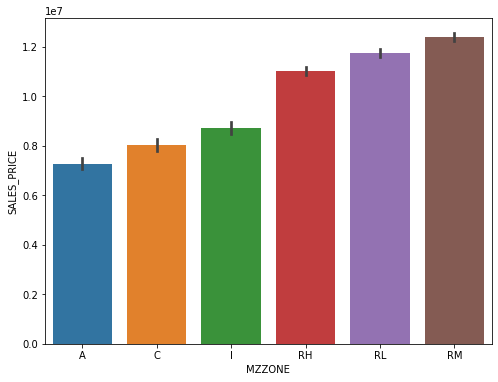

In [ ]:
plt.figure(figsize= (8,6))
sns.barplot(x="MZZONE",y="SALES_PRICE",data=data,order=data.groupby("MZZONE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["MZZONE"])

* The prices are increase when the respective zones.
* RM zone has most expensive houses.
* A sone has very cheap house price.
* There is a Linear Relationship Between Mzzone And Sales_price
* Hence We Are Using Lable Encoding

**House YearSold**

In [ ]:
house_built = data.YearBuild.value_counts()
house_built

1985    197
1988    197
2002    191
1990    189
1996    188
       ... 
1954     11
2010      9
1951      6
1949      2
1950      2
Name: YearBuild, Length: 62, dtype: int64

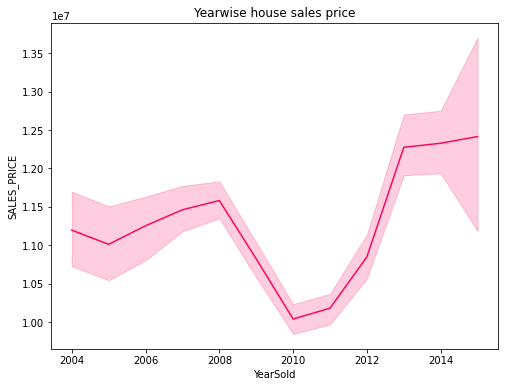

In [ ]:
plt.figure(figsize= (8,6))
sns.lineplot(data=data, x='YearSold', y='SALES_PRICE', color='#FC0660')
plt.title("Yearwise house sales price")
plt.show()

* The above graph shows that the initial year house sale price was good after reaching the 2010 the house sales price was very very low after that slightly increasing the house sales price  in the year 2014


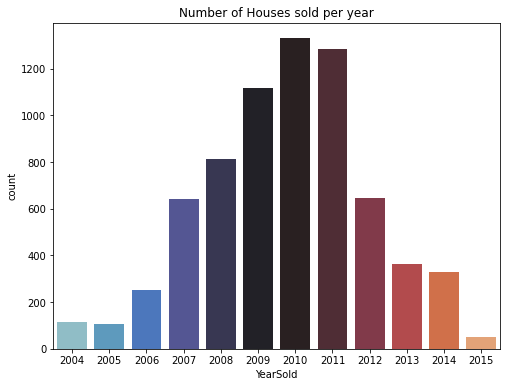

In [ ]:
# Number of houses sold per year
plt.figure(figsize= (8,6))
sns.countplot(data=data, x='YearSold', palette='icefire')
plt.title("Number of Houses sold per year")
plt.show()

* The year of 2010 was highest number of houses sold because of the very very low house prices
* Least number of houses are sold in 2004, 2005, and 2015. 


**Age of the house**

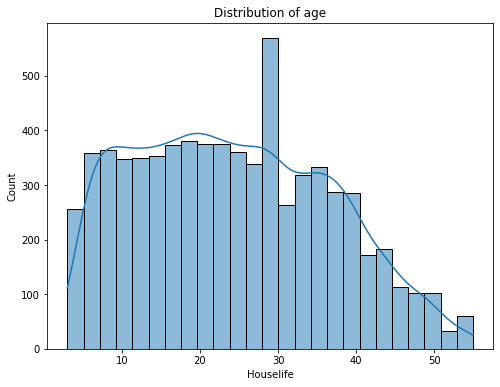

In [ ]:
plt.figure(figsize= (8,6))
sns.histplot(data=data, x='Houselife', kde=True)
plt.title("Distribution of age")
plt.show()

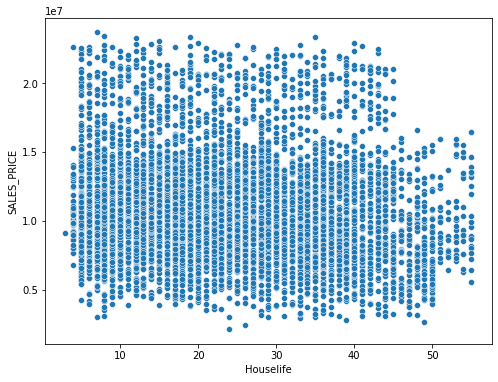

In [ ]:
plt.figure(figsize= (8,6))
sns.scatterplot(data=data, x="Houselife", y="SALES_PRICE")

* higher house age the price was decreased 
* latest house only the sale the highest price

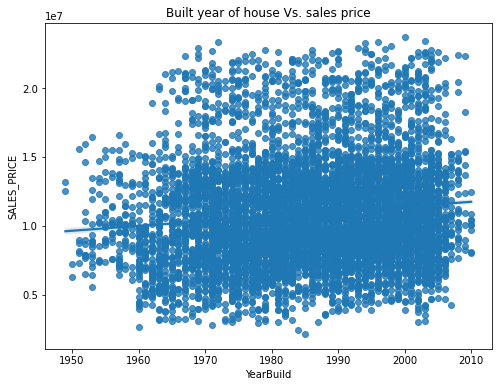

In [ ]:
plt.figure(figsize= (8,6))
ax = sns.regplot(data=data, x='YearBuild', y='SALES_PRICE')
plt.title("Built year of house Vs. sales price")
plt.show()

YearBuild vs SALES_PRICE follows the linear relationships

**QS_ROOMS**

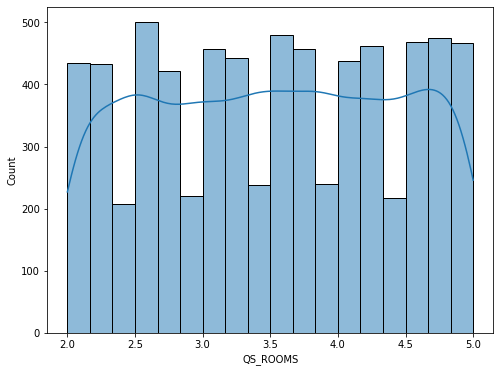

In [ ]:
plt.figure(figsize= (8,6))
sns.histplot(data=data, x='QS_ROOMS', kde=True);

* Distribution of QS_ROOMS is uniform
* drop these feature 

**QS_OVERALL**

In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'YearSold', 'YearBuild', 'Houselife'],
      dtype='object')

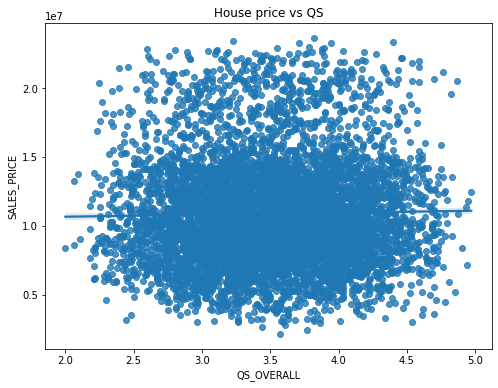

In [ ]:
plt.figure(figsize= (8,6))

sns.regplot(data=data, x='QS_OVERALL', y='SALES_PRICE')
plt.title("House price vs QS")
plt.show()

QS_OVERALL  follows the uniform distribution with sales price

**Encoding the categorical features**

**AREA**

In [ ]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
data["AREA"] = data["AREA"].map({"Karapakkam": 1 , "Adyar" : 2, "Chrompet" : 3, "Velachery" : 4, "KK Nagar" : 5, "Anna Nagar" : 6, "T Nagar" : 7})


In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YearSold,YearBuild,Houselife
0,1,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,6,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,2,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,4,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,1,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30


In [ ]:
data["AREA"] = np.floor(pd.to_numeric(data["AREA"])).astype("Int64")

In [ ]:
data.tail()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YearSold,YearBuild,Houselife
7104,1,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.52,5353000,2011,1962,49
7105,4,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.92,10818480,2004,1995,9
7106,4,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.84,8351410,2006,1978,28
7107,1,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.16,8507000,2009,1977,32
7108,4,1896,156,3,2,5,Partial,Yes,Others,ELO,Paved,I,3.1,3.5,4.3,3.64,9976480,2005,1961,44


In [ ]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [ ]:
data['SALE_COND'] = data['SALE_COND'].map({'Partial': 1 , 'Family' : 2, 'AbNormal' : 4, 'Normal Sale' : 5, 'AdjLand' : 6})

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YearSold,YearBuild,Houselife
0,1,1004,131,1,1,3,4,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,6,1986,26,2,1,5,4,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,2,909,70,1,1,3,4,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,4,1855,14,3,2,5,2,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,1,1226,84,1,1,3,4,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30


In [ ]:
data["PARK_FACIL"] = data["PARK_FACIL"].map({"Yes": 0 , "No" : 1})

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YearSold,YearBuild,Houselife
0,1,1004,131,1,1,3,4,0,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,6,1986,26,2,1,5,4,1,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,2,909,70,1,1,3,4,0,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,4,1855,14,3,2,5,2,1,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,1,1226,84,1,1,3,4,0,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30


In [ ]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [ ]:
data["UTILITY_AVAIL"] = data["UTILITY_AVAIL"].map({"ELO": 1 , "NoSeWa" : 2,"NoSewr":3, "AllPub":4})

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YearSold,YearBuild,Houselife
0,1,1004,131,1,1,3,4,0,Commercial,4,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,6,1986,26,2,1,5,4,1,Commercial,4,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,2,909,70,1,1,3,4,0,Commercial,1,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,4,1855,14,3,2,5,2,1,Others,3,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,1,1226,84,1,1,3,4,0,Others,4,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30


In [ ]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [ ]:
data["STREET"] = data["STREET"].map({"No Access": 1 , "Paved" : 2, "Gravel":3})

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YearSold,YearBuild,Houselife
0,1,1004,131,1,1,3,4,0,Commercial,4,2,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,6,1986,26,2,1,5,4,1,Commercial,4,3,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,2,909,70,1,1,3,4,0,Commercial,1,3,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,4,1855,14,3,2,5,2,1,Others,3,2,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,1,1226,84,1,1,3,4,0,Others,4,3,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30


In [ ]:
data.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
data["MZZONE"] = data["MZZONE"].map({"A": 1 , "C" : 2, "I": 3, "RH": 4, "RL" : 5, "RM" : 6})

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YearSold,YearBuild,Houselife
0,1,1004,131,1,1,3,4,0,Commercial,4,2,1,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,6,1986,26,2,1,5,4,1,Commercial,4,3,4,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,2,909,70,1,1,3,4,0,Commercial,1,3,5,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,4,1855,14,3,2,5,2,1,Others,3,2,3,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,1,1226,84,1,1,3,4,0,Others,4,3,2,3.0,2.5,4.1,3.290,7406250,2009,1979,30


In [ ]:
data = pd.get_dummies(data)

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YearSold,YearBuild,Houselife,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1,1,3,4,0,4,2,1,4.0,3.9,4.9,4.330,7600000,2011,1967,44,1,0,0
1,6,1986,26,2,1,5,4,1,4,3,4,4.9,4.2,2.5,3.765,21717770,2006,1995,11,1,0,0
2,2,909,70,1,1,3,4,0,1,3,5,4.1,3.8,2.2,3.090,13159200,2012,1992,20,1,0,0
3,4,1855,14,3,2,5,2,1,3,2,3,4.7,3.9,3.6,4.010,9630290,2010,1988,22,0,0,1
4,1,1226,84,1,1,3,4,0,4,3,2,3.0,2.5,4.1,3.290,7406250,2009,1979,30,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AREA                  7056 non-null   Int64  
 1   INT_SQFT              7056 non-null   int64  
 2   DIST_MAINROAD         7056 non-null   int64  
 3   N_BEDROOM             7056 non-null   Int64  
 4   N_BATHROOM            7056 non-null   Int64  
 5   N_ROOM                7056 non-null   int64  
 6   SALE_COND             7056 non-null   int64  
 7   PARK_FACIL            7056 non-null   int64  
 8   UTILITY_AVAIL         7056 non-null   int64  
 9   STREET                7056 non-null   int64  
 10  MZZONE                7056 non-null   int64  
 11  QS_ROOMS              7056 non-null   float64
 12  QS_BATHROOM           7056 non-null   float64
 13  QS_BEDROOM            7056 non-null   float64
 14  QS_OVERALL            7056 non-null   float64
 15  SALES_PRICE          

In [ ]:
data.isna().sum()

AREA                    0
INT_SQFT                0
DIST_MAINROAD           0
N_BEDROOM               0
N_BATHROOM              0
N_ROOM                  0
SALE_COND               0
PARK_FACIL              0
UTILITY_AVAIL           0
STREET                  0
MZZONE                  0
QS_ROOMS                0
QS_BATHROOM             0
QS_BEDROOM              0
QS_OVERALL              0
SALES_PRICE             0
YearSold                0
YearBuild               0
Houselife               0
BUILDTYPE_Commercial    0
BUILDTYPE_House         0
BUILDTYPE_Others        0
dtype: int64

**All the distribution of the Data**

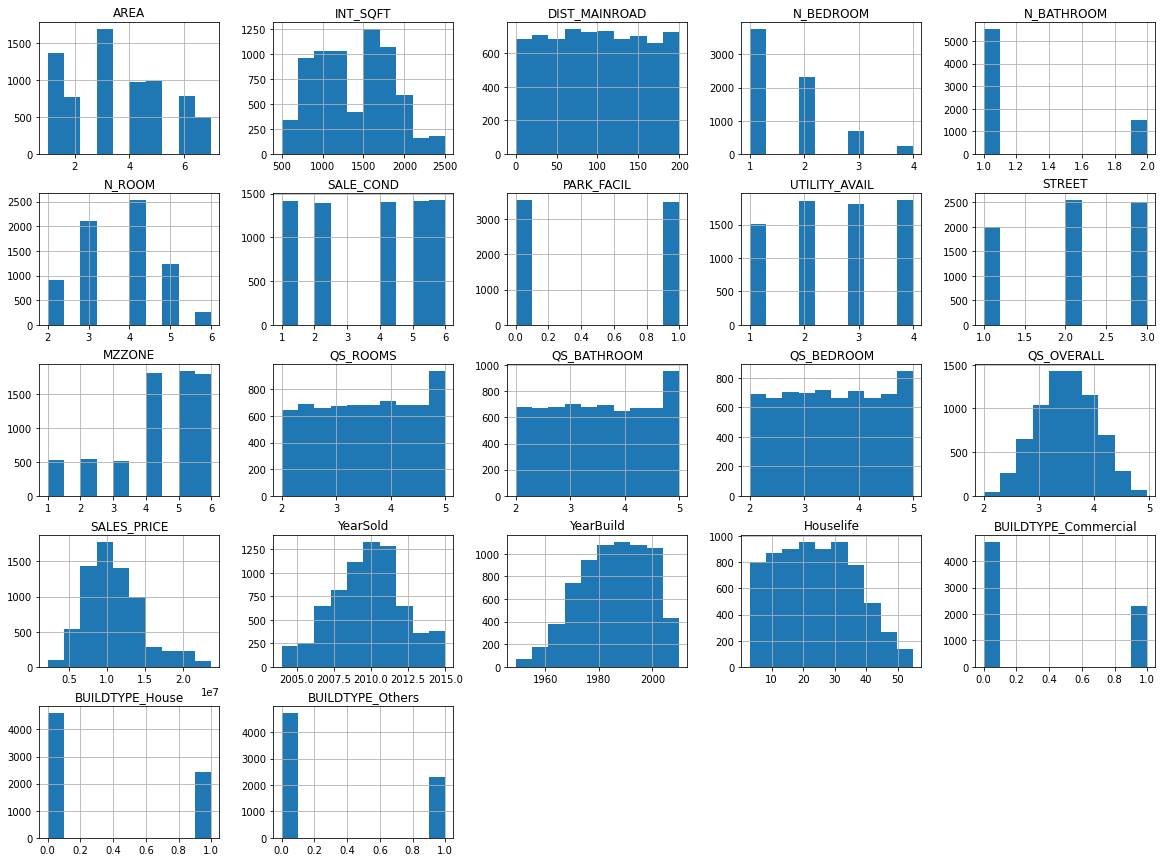

In [ ]:
data.hist(bins=10,figsize=(20,15))
plt.show()

**Corelation**

In [ ]:
# Feature correlation 
data.corr()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YearSold,YearBuild,Houselife,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
AREA,1.000000,0.685148,0.002787,0.322189,-0.042100,0.645081,0.000552,-0.008597,0.050283,0.071059,0.344667,0.023097,0.002731,0.005433,0.017856,0.694215,-0.023885,0.069159,-0.075216,0.013466,-0.012934,-0.000367
INT_SQFT,0.685148,1.000000,0.002267,0.786721,0.517103,0.951305,0.005917,-0.004771,0.069257,0.090918,0.142489,0.020495,-0.007249,0.009643,0.013830,0.612668,-0.124931,-0.008527,-0.013608,0.010562,-0.007196,-0.003273
DIST_MAINROAD,0.002787,0.002267,1.000000,-0.001938,0.002496,0.002313,-0.010578,0.009775,-0.007255,0.002018,0.005935,0.002739,-0.030999,0.001141,-0.017482,0.018062,0.012379,0.005148,-0.003065,0.022047,-0.018710,-0.003098
N_BEDROOM,0.322189,0.786721,-0.001938,1.000000,0.756016,0.840654,0.007907,0.009687,0.085164,0.116029,0.050957,0.015508,-0.006461,0.015810,0.013932,0.332595,-0.185867,0.012066,-0.045636,0.001040,0.004490,-0.005587
N_BATHROOM,-0.042100,0.517103,0.002496,0.756016,1.000000,0.570110,0.011054,0.013968,0.050814,0.071334,-0.045138,0.013487,-0.011091,0.012278,0.007858,0.110984,-0.105220,0.000288,-0.019123,-0.005600,0.017766,-0.012392
N_ROOM,0.645081,0.951305,0.002313,0.840654,0.570110,1.000000,0.003137,0.000948,0.064721,0.088951,0.163375,0.016710,-0.006636,0.015618,0.015234,0.603417,-0.110312,0.014233,-0.034339,0.010704,-0.005443,-0.005191
SALE_COND,0.000552,0.005917,-0.010578,0.007907,0.011054,0.003137,1.000000,-0.004392,-0.012009,-0.000410,0.000526,-0.012293,0.006813,0.004208,0.000858,0.054029,-0.001869,-0.010973,0.010922,-0.006170,0.000093,0.006076
PARK_FACIL,-0.008597,-0.004771,0.009775,0.009687,0.013968,0.000948,-0.004392,1.000000,0.030528,0.002516,0.006849,0.008261,0.011739,0.000967,0.010001,-0.146975,0.002853,-0.008599,0.009332,-0.010873,0.009243,0.001511
UTILITY_AVAIL,0.050283,0.069257,-0.007255,0.085164,0.050814,0.064721,-0.012009,0.030528,1.000000,0.039561,0.027959,0.011741,-0.017313,0.016207,0.005568,0.064800,0.017032,0.040326,-0.038318,0.024099,0.000672,-0.024777
STREET,0.071059,0.090918,0.002018,0.116029,0.071334,0.088951,-0.000410,0.002516,0.039561,1.000000,0.041087,0.003011,0.003818,0.023576,0.014988,0.150060,-0.011906,0.036572,-0.039645,-0.011925,0.013831,-0.002083


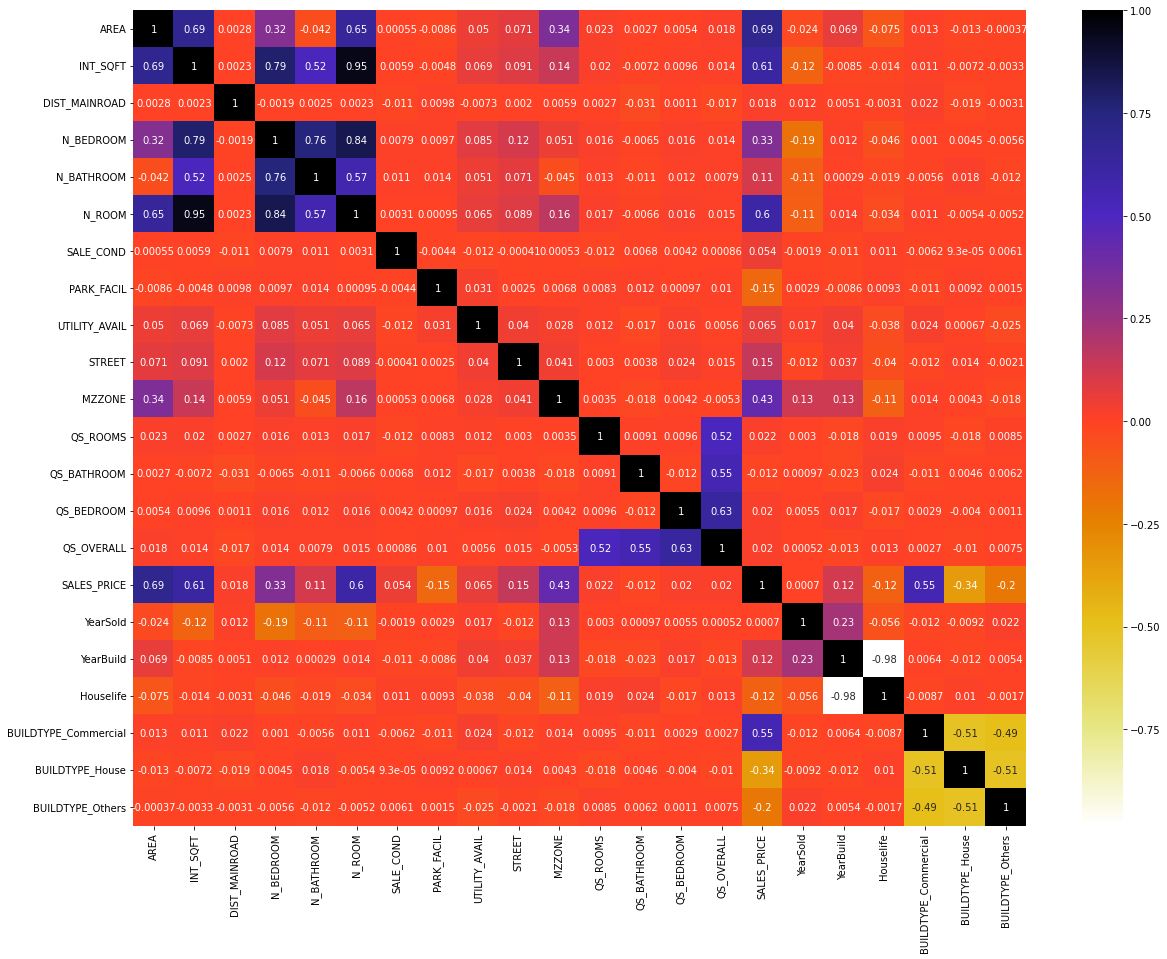

In [ ]:
plt.figure(figsize=(20,15))
cor = data.corr()
sns.heatmap(cor,annot = True, cmap=plt.cm.CMRmap_r)
plt.show()

* The features are near by 1 is postive corelation
* The features are below 0 is negative corelation

# Drop unnecessary feature

* feature like  QS_ROOMS, QS_BATHROOMS, QS_OVERALL, DIST_MAINROAD these are all not  relatable to sales price.
* Drop these columns

In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'SALES_PRICE', 'YearSold', 'YearBuild', 'Houselife',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

In [ ]:
data.drop(['DIST_MAINROAD', 'QS_ROOMS', 'QS_BATHROOM','QS_OVERALL', 'QS_BEDROOM','DIST_MAINROAD','YearSold'], axis=1, inplace=True)

In [ ]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,YearBuild,Houselife,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,1,1,3,4,0,4,2,1,7600000,1967,44,1,0,0
1,6,1986,2,1,5,4,1,4,3,4,21717770,1995,11,1,0,0
2,2,909,1,1,3,4,0,1,3,5,13159200,1992,20,1,0,0
3,4,1855,3,2,5,2,1,3,2,3,9630290,1988,22,0,0,1
4,1,1226,1,1,3,4,0,4,3,2,7406250,1979,30,0,0,1


In [ ]:
std = data.std().mean()

# Split the data

In [ ]:
X =data.drop(['SALES_PRICE'],axis=1).copy()
y = data['SALES_PRICE'].copy()

In [ ]:
X.shape, y.shape

((7056, 15), (7056,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, random_state=47, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5644, 15), (5644,), (1412, 15), (1412,))

# Feature Scaling 

* It is necessary to scale the features for parametric models.

* Non parametric models like Random Forest and Decision Tree can handle unscaled data without any learning issue.

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[-0.83725394 -0.76837789 -0.79424332 ...  1.45423185 -0.72541739
  -0.70842268]
 [-1.37960001 -0.21107531 -0.79424332 ...  1.45423185 -0.72541739
  -0.70842268]
 [ 0.78978425 -0.16770546 -0.79424332 ... -0.68764826 -0.72541739
   1.41158665]
 ...
 [ 1.87447637  1.13989553  0.44032272 ... -0.68764826 -0.72541739
   1.41158665]
 [ 1.33213031  0.51970667 -0.79424332 ... -0.68764826  1.37851671
  -0.70842268]
 [ 0.78978425  1.89019394  2.90945482 ... -0.68764826  1.37851671
  -0.70842268]]


In [ ]:
print(X_test)

[[ 0.24743818  1.24832015  1.67488877 ...  1.45423185 -0.72541739
  -0.70842268]
 [ 1.33213031  0.3939341  -0.79424332 ... -0.68764826 -0.72541739
   1.41158665]
 [-0.29490788 -1.15653805 -0.79424332 ...  1.45423185 -0.72541739
  -0.70842268]
 ...
 [-0.83725394 -0.76187241 -0.79424332 ... -0.68764826  1.37851671
  -0.70842268]
 [-0.29490788 -1.31050102 -0.79424332 ... -0.68764826 -0.72541739
   1.41158665]
 [ 1.87447637  1.16158045  0.44032272 ...  1.45423185 -0.72541739
  -0.70842268]]


# **Building the Model**





## **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

# predict
y_pred = lr.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
lr_score = metrics.r2_score(y_test, y_pred)
lr_mae = metrics.mean_absolute_error(y_test, y_pred)
print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test score: {:.2f}".format(lr.score(X_test, y_test)))

Training score: 0.92
Test score: 0.92


In [ ]:
print("R2 score: {:.2f}".format(metrics.r2_score(y_test, y_pred)))
print("MSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))

R2 score: 0.92
MSE: 1081327109184.13
MAE: 794029.70


In [ ]:
lr_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred.flatten()
})

lr_prediction.head(20)

,actual,predicted
6990,14647650,1.386451e+07
1433,11470100,1.219468e+07
6710,12560200,1.404301e+07
2567,15209340,1.459850e+07
6065,13239280,1.419044e+07
3564,13776050,1.354079e+07
2820,9618640,1.079411e+07
446,17265880,1.716534e+07
5044,9393450,8.926521e+06
3886,11648840,1.277729e+07


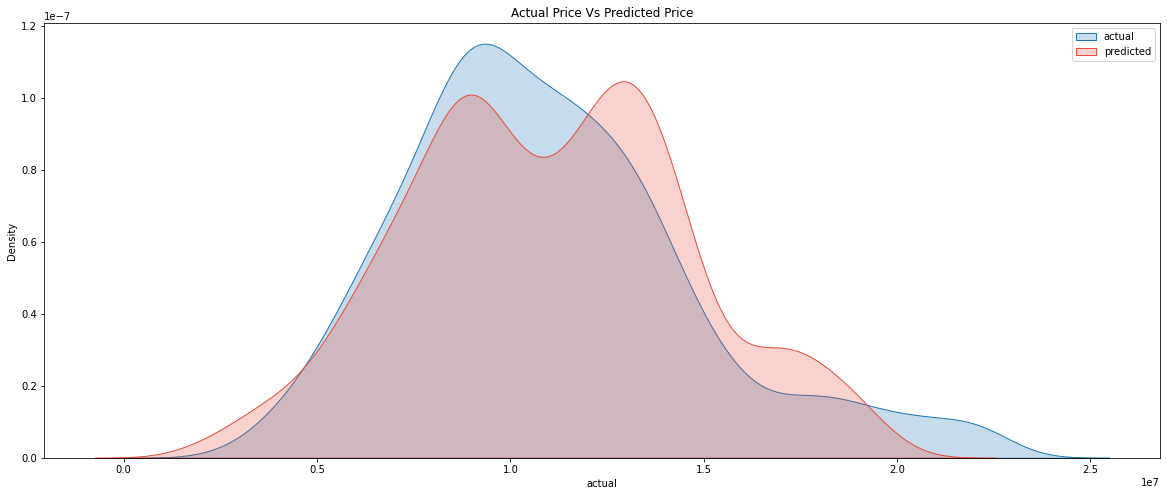

In [ ]:
plt.figure(figsize=(20,8))
sns.kdeplot(data=lr_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=lr_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

* The linear regression model has 92% r2 score
* The Actual price vs predicted price mostly same we perfectly fit the model

# KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_regressor = KNeighborsRegressor().fit(X_train, y_train)

knn_ypred = knn_regressor.predict(X_test)


print("KNN regressor train score: {:.2f}".format(knn_regressor.score(X_train, y_train)))
print("KNN regressor test score: {:.2f}".format(knn_regressor.score(X_test, y_test)))

KNN regressor train score: 0.96
KNN regressor test score: 0.95


# Cross validation of KNN Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedKFold

In [ ]:
knn_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=dict(n_neighbors=[2,5,10,15,20,24,25,28,30,]), cv=3)

knn_search.fit(X,y)

print("Best parameter:", knn_search.best_params_)
print("Best score: ",knn_search.best_score_)

Best parameter: {'n_neighbors': 24}
Best score:  0.420003871225586


In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=24).fit(X_train, y_train)

knn_ypred = knn_regressor.predict(X_test)

knn_score = metrics.r2_score(y_test, knn_ypred)
knn_mae = metrics.mean_absolute_error(y_test, knn_ypred)

print("KNN regressor train score: {:.2f}".format(knn_regressor.score(X_train, y_train)))
print("KNN regressor test score: {:.2f}".format(knn_regressor.score(X_test, y_test)))
print("KNN r2 score: {:.2f}".format(knn_score))

KNN regressor train score: 0.93
KNN regressor test score: 0.92
KNN r2 score: 0.92


# Decision Tree Regression


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_regressor = DecisionTreeRegressor(max_depth=7).fit(X_train, y_train)

dt_y_predict = dt_regressor.predict(X_test)

In [ ]:
dt_score = metrics.r2_score(y_test, dt_y_predict)
dt_mae = metrics.mean_absolute_error(y_test, dt_y_predict)

print("DT Training score: {:.2f}".format(dt_regressor.score(X_train, y_train)))
print("DT Test score: {:.2f}".format(dt_regressor.score(X_test, y_test)))

print("")
print("DT R2 score: {:.2f}".format(metrics.r2_score(y_test, dt_y_predict)))
print("DT MSE: {:.2f}".format(metrics.mean_squared_error(y_test, dt_y_predict)))
print("DT MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, dt_y_predict)))

DT Training score: 0.96
DT Test score: 0.95

DT R2 score: 0.95
DT MSE: 701740012192.83
DT MAE: 672997.48


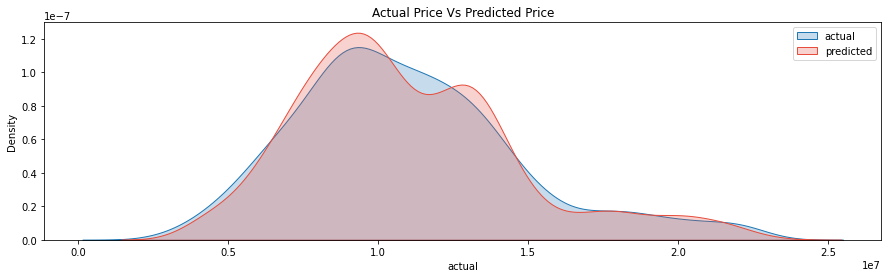

In [ ]:
dt_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted': dt_y_predict.flatten()
})


plt.figure(figsize=(15,4))
sns.kdeplot(data=dt_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=dt_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

* The Decision Tree Regressor predicted value nearly equal to acutal value so the Decsion tree has better prediction model
* 95% of test data

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [ ]:
rf_regressor = RandomForestRegressor(random_state=0).fit(X_train, y_train)

rf_y_predict = rf_regressor.predict(X_test)


In [ ]:
rf_score = metrics.r2_score(y_test, rf_y_predict)
rf_mae = metrics.mean_absolute_error(y_test, rf_y_predict)

In [ ]:
print("RF Training score: {:.2f}".format(rf_regressor.score(X_train, y_train)))
print("RF Test score: {:.2f}".format(rf_regressor.score(X_test, y_test)))

RF Training score: 1.00
RF Test score: 0.99


In [ ]:
print("RF R2 score: {:.3f}".format(metrics.r2_score(y_test, rf_y_predict)))
print("RF MSE: {:.2f}".format(metrics.mean_squared_error(y_test, rf_y_predict)))
print("RF MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, rf_y_predict)))

RF R2 score: 0.989
RF MSE: 152635328826.05
RF MAE: 306384.66


* The Random forest regressor is more than Decision Tree Regressor
* 99% of R2 score 

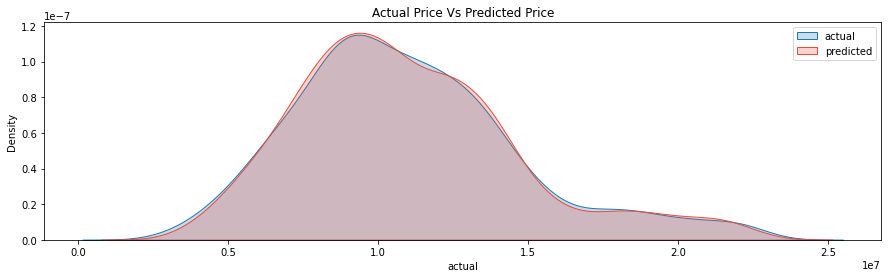

In [ ]:
rf_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted': rf_y_predict.flatten()
})


plt.figure(figsize=(15,4))
sns.kdeplot(data=rf_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=rf_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

* The graphs looks like the predicted price was nearly colose to acutal value
* Random Forest model perform better prediction of the model

# AdaBoost Regression

In [ ]:
ada_reg = AdaBoostRegressor(random_state=1).fit(X_train, y_train)

ada_y_predict = ada_reg.predict(X_test)

# score 
adaboost_score = metrics.r2_score(y_test, ada_y_predict)
adaboost_mae = metrics.mean_absolute_error(y_test, ada_y_predict)

print("AdaBoostReg Train Score: {:.2f}".format(ada_reg.score(X_train, y_train)))
print("AdaBoostReg Test score: {:.2f}".format(ada_reg.score(X_test, y_test)))

AdaBoostReg Train Score: 0.92
AdaBoostReg Test score: 0.92


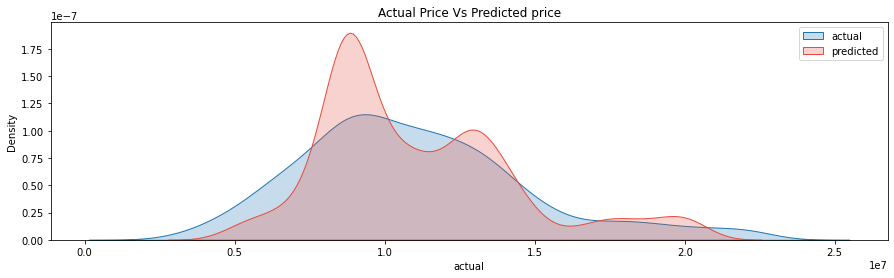

In [ ]:
adaboost_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted': ada_y_predict.flatten()
})


plt.figure(figsize=(15,4))
sns.kdeplot(data=adaboost_prediction, x='actual', label='actual',shade=True)
sns.kdeplot(data=adaboost_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted price")
plt.legend()
plt.show()

* The model score was good but comparet to other model its performs not looks so good


# XgBoost Regressor

In [ ]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor().fit(X_train,y_train)

[05:48:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xg_y_predict = xg_reg.predict(X_test)

In [ ]:
xg_score = metrics.r2_score(y_test, xg_y_predict)
xg_mae = metrics.mean_absolute_error(y_test, xg_y_predict)

In [ ]:
print("RF R2 score: {:.3f}".format(metrics.r2_score(y_test, xg_y_predict)))
print("RF MSE: {:.2f}".format(metrics.mean_squared_error(y_test, xg_y_predict)))
print("RF MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, xg_y_predict)))

RF R2 score: 0.990
RF MSE: 147837685098.03
RF MAE: 290471.87


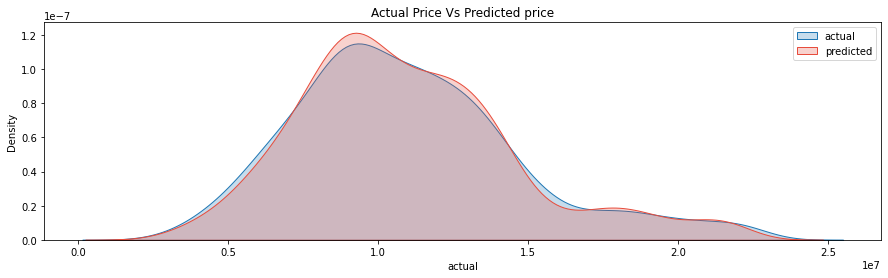

In [ ]:
xgboost_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted': xg_y_predict.flatten()
})


plt.figure(figsize=(15,4))
sns.kdeplot(data=xgboost_prediction, x='actual', label='actual',shade=True)
sns.kdeplot(data=xgboost_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted price")
plt.legend()
plt.show()

In [ ]:
xgboost_prediction.head(20)

,actual,predicted
6990,14647650,14821004.0
1433,11470100,11433352.0
6710,12560200,12293624.0
2567,15209340,15013656.0
6065,13239280,13523286.0
3564,13776050,12986744.0
2820,9618640,9566084.0
446,17265880,17452056.0
5044,9393450,9310270.0
3886,11648840,11599678.0


* Xgboost also best accuracy score
* The Actual vs predicted price is very close ot each other

# **Model Comparison**

In [ ]:
models_df = pd.DataFrame({
    'model': "Linear KNN DecisionTree RandomForerst AdaBoost XgBoost".split(),
    'r2_score': [lr_score, knn_score, dt_score, rf_score, adaboost_score,xg_score],
    'mae': [lr_mae, knn_mae, dt_mae, rf_mae, adaboost_mae,xg_mae]
})

models_df

,model,r2_score,mae
0,Linear,0.924652,794029.697661
1,KNN,0.923424,830410.093248
2,DecisionTree,0.951102,672997.484129
3,RandomForerst,0.989364,306384.661225
4,AdaBoost,0.916326,892529.217923
5,XgBoost,0.989699,290471.871105


* The RandomForest and XgBoost has better accuarcy score for the house price data set


In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf.feature_importances_

array([0.48101163, 0.1080476 , 0.00177874, 0.00207118, 0.00287774,
       0.00273463, 0.01482568, 0.00145197, 0.01048182, 0.0397488 ,
       0.00323961, 0.00335946, 0.32368047, 0.00227472, 0.00241594])

In [ ]:
feature_scores = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

AREA                    0.481012
BUILDTYPE_Commercial    0.323680
INT_SQFT                0.108048
MZZONE                  0.039749
PARK_FACIL              0.014826
STREET                  0.010482
Houselife               0.003359
YearBuild               0.003240
N_ROOM                  0.002878
SALE_COND               0.002735
BUILDTYPE_Others        0.002416
BUILDTYPE_House         0.002275
N_BATHROOM              0.002071
N_BEDROOM               0.001779
UTILITY_AVAIL           0.001452
dtype: float64

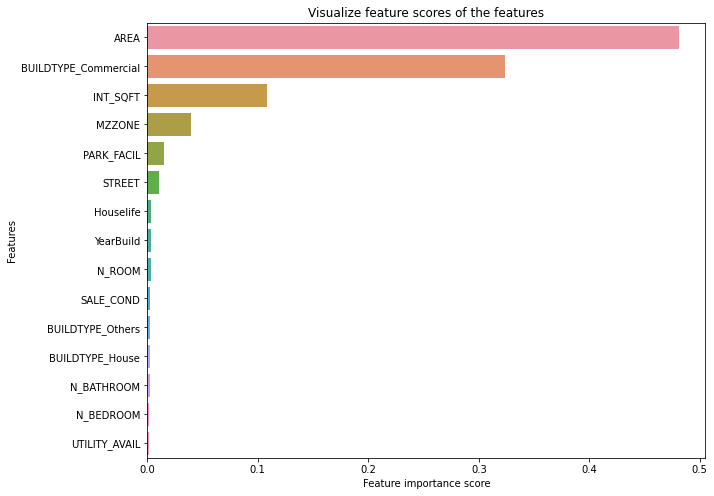

In [ ]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## PREDICT THE PRICE

In [ ]:
input_data = (1,1004,1,1,3,4,0,4,2,1,1967,44,1,0,0)

input_np_array = np.asarray(input_data)
input_reshape = input_np_array.reshape(1,-1)
std_data = scaler.transform(input_reshape)




In [ ]:
stdr=round(std)


In [ ]:
prediction = xg_reg.predict(std_data)
pre = np.round(prediction)
pr= pre.astype(int)
price = pr[0]
print("The price between", (price-stdr),"to",(price+stdr))



The price between 7561002 to 8032198


# Sellers understand what factors are fetching more money for the Houses

### AREA
* Area is the Most important Feature for profitability,
* Area plays a crucial Role for deciding the best price of the houses. 
* The area with more facilites will have higer price.
* The area with low facilites will have low price.
* In Chennai, T.Nagar has highest house price.

### BUILDTYPE
* Buildtype is the second most important Feature for better investments.
* Commercial Houses are most expensive compared to normal house.
* Commercial buildings are hospitals, shopping malls,stores,IT companies etc., 
* The investment of commercial building is more valuable than normal houses for the future profits.

#### SQUARE FEET
* As the square Footage of the house increases, the price of the house also increases. 
* Square footage is essential for the viability of the investment.


### ZONE
* Zone also plays a major role in deciding the house price.
* Commercial and Industrial zones are more profitable. 
